In [1]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 52.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


8.800000000000086
33.65


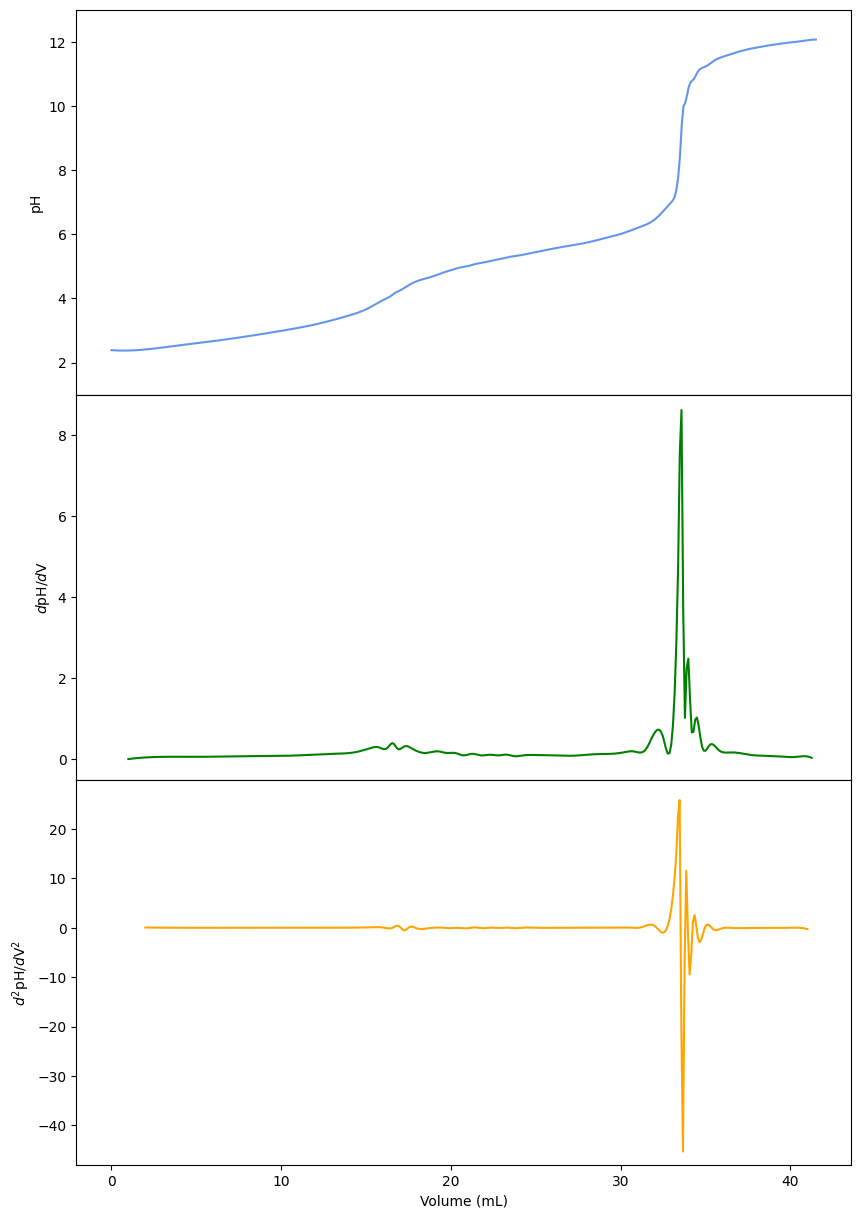

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#adding to "smooth data"
from scipy.interpolate import make_interp_spline, BSpline

#establishes dimensions and relative locations of subplots (in this case, 3 rows, one column)
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.subplots_adjust(hspace=0)

#experimental data
data = np.array([
    [0.00, 2.39],
    [2.00, 2.41],
    [4.00, 2.54],
    [6.00, 2.67],
    [8.00, 2.82],
    [10.00, 2.99],
    [12.00, 3.19],
    [14.00, 3.47],
    [15.00, 3.66],
    [15.50, 3.80],
    [16.00, 3.95],
    [16.50, 4.09],
    [16.70, 4.17],
    [17.00, 4.25],
    [17.50, 4.41],
    [18.00, 4.54],
    [19.00, 4.70],
    [19.50, 4.80],
    [20.00, 4.88],
    [20.50, 4.96],
    [21.00, 5.01],
    [21.50, 5.08],
    [22.00, 5.13],
    [22.60, 5.20],
    [23.00, 5.24],
    [23.50, 5.30],
    [24.00, 5.34],
    [24.50, 5.39],
    [25.50, 5.50],
    [26.50, 5.60],
    [28.00, 5.74],
    [29.00, 5.87],
    [30.00, 6.01],
    [30.50, 6.10],
    [31.00, 6.20],
    [32.00, 6.46],
    [33.00, 7.01],
    [33.25, 7.30],
    [33.40, 7.84],
    [33.50, 8.49],
    [33.65, 9.81],
    [33.80, 10.09],
    [34.00, 10.57],
    [34.30, 10.83],
    [34.50, 11.03],
    [35.00, 11.23],
    [35.50, 11.41],
    [36.00, 11.53],
    [36.70, 11.65],
    [37.00, 11.70],
    [38.00, 11.82],
    [39.00, 11.91],
    [40.00, 11.98],
    [40.50, 12.01],
    [41.00, 12.05],
    [41.50, 12.07]
])

# Extract the first column into a separate array
v = data[:, 0]

# Extract the second column into a separate array
pH = data[:, 1]

#smoothed data for experimental data
vnew = np.linspace(v.min(), v.max(), 400) 
#define spline
spl = make_interp_spline(v, pH, k=3)
pH_smooth = spl(vnew)

#first derivative
dv = np.array([(v[i+1] + v[i])/2 for i in range(len(v)-1)])
dpH = np.array([(pH[i+1]-pH[i])/(v[i+1]-v[i]) for i in range (len(v)-1)])

#smoothed data for 1st derivative
dvnew = np.linspace(dv.min(), dv.max(), 400) 
#define spline
dspl = make_interp_spline(dv, dpH, k=3)
dpH_smooth = dspl(dvnew)


#second derivative
ddv = np.array([(dv[i+1] + dv[i])/2 for i in range(len(dv)-1)])
ddpH = np.array([(dpH[i+1]-dpH[i])/(dv[i+1]-dv[i]) for i in range (len(dv)-1)])

#smoothed data for 1st derivative
ddvnew = np.linspace(ddv.min(), ddv.max(), 400) 
#define spline
ddspl = make_interp_spline(ddv, ddpH, k=3)
ddpH_smooth = ddspl(dvnew)

#finding the equivalence point
max_val = dpH.max()
max_val_index = np.argmax(dpH)
#volume where the maximum dpH value is located
corresponding_v = ddv[max_val_index]

print(max_val)
print(corresponding_v)

#graph of titration alone
ax1.plot(vnew, pH_smooth, color='cornflowerblue')
#ax1.set_xlim(0, 55)
ax1.set_ylim(1,13)
ax1.set_yticks(np.arange(2,14,2))
ax1.set_ylabel('pH')
ax1.grid(False)

#plotting equivalence point on normal titration
#ax1.plot(16.5, 6, 'ko', markersize=4)
#ax1.plot(8.25, 2.59, 'kx', markersize=4)
#ax1.plot(24.75, 9.75, 'kx', markersize=4)

#graph of 1st derivative of titration 
ax2.plot(dvnew, dpH_smooth, color='green')
#ax2.set_xlim(0, 55)
ax2.set_ylim(-0.5,9)
ax2.set_yticks(np.arange(0,9,2))
ax2.set_ylabel('$d$pH/$d$V')
ax2.grid(False)

#plotting equivalence point on the 1st derivative graph
#ax2.plot(16.4, 3.94, 'ko', markersize=4)
#ax2.plot(8.25, 0.1, 'kx', markersize=4)
#ax2.plot(24.75, 0.105, 'kx', markersize=4)

#graph of 2nd derivative of titration 
ax3.plot(ddvnew, ddpH_smooth, color='orange')
#ax3.set_xlim(0, 55)
ax3.set_ylim(-48,30)
ax3.set_yticks(np.arange(-40,30,10))
ax3.set_xlabel('Volume (mL)')
ax3.set_ylabel('$d^2$pH/$d\mathrm{V}^2$')
ax3.grid(False)

#plotting equivalence point on the 2nd derivative graph (16.7 value = from corresponding_value)
#ax3.plot(16.7, 0, 'ko', markersize=4)
#ax3.plot(8.25, 0.03, 'kx', markersize=4)
#ax3.plot(24.75, 0.08, 'kx', markersize=4)


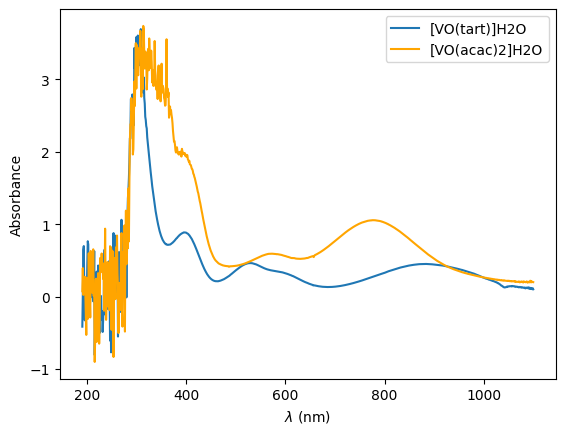

In [18]:
import numpy as np
import matplotlib.pyplot as plt

l = [190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
tA = [-0.4145674706,0.02589464188,0.6456212997,0.6974010468,0.01741027832,-0.3270630836,-0.05761051178,0.124786377,0.02173519135,-0.02792644501,0.4316682816,0.7641477585,0.7208037376,0.01697969437,-0.1756191254,-0.1743927002,0.003358364105,-0.003705501556,0.0105638504,0.2477078438,0.2704658508,-0.00505065918,-0.06463003159,0.00417137146,0.6284184456,-0.8068161011,-0.3343453407,0.3258171082,-0.1353898048,0.3449935913,0.2247424126,-0.5125799179,0.4294481277,0.0002136230469,-0.4459495544,-0.5021772385,-0.2046732903,0.01196670532,-0.3197059631,-0.1969180107,-0.2461185455,-0.487783432,-0.3284773827,-0.1541342735,0.4356713295,0.6483607292,-0.2464914322,0.04914951324,0.05567598343,0.07944822311,0.0007719993591,0.1372218132,-0.1724734306,0.2993044853,0.4881939888,0.0385260582,-0.6074318886,0.1199245453,-0.7689771652,0.4968152046,-0.3454976082,-0.01574802399,0.5649061203,0.876739502,0.4186401367,0.5650048256,0.8427753448,0.08422660828,0.08631706238,0.7067146301,0.05624723434,0.4652957916,-0.5508337021,0.5177016258,0.6146268845,0.4592528343,0.0651473999,-0.2105536461,0.6295657158,1.060172558,0.3183493614,0.5126371384,0.5125522614,0.1038370132,0.4653778076,0.7171773911,0.5781698227,0.9348349571,0.5338916779,-0.01113605499,0.611263752,1.099646091,1.359121323,1.464398384,1.630377769,1.855648518,2.186537743,2.182674408,2.728839397,2.736926556,2.582001209,2.789757252,2.738605976,2.445299625,2.365632534,3.431242943,3.149419308,3.294651985,3.468840122,3.580943584,3.229352474,3.399168968,3.602800369,3.231983185,3.363568783,3.43989563,3.281942368,3.189781189,3.691535473,3.314516544,2.825285435,2.927237034,3.238622189,2.81229353,3.023927212,2.744278431,2.663282871,2.482206821,2.438468456,2.354043961,2.32163763,2.198212147,2.133127213,2.056738853,1.990615845,1.919974804,1.849890232,1.78674984,1.716297626,1.660553932,1.593428612,1.526431084,1.474877357,1.422232151,1.372109413,1.316523075,1.271257401,1.22441864,1.176468849,1.135816097,1.097484589,1.06167078,1.023822308,0.9930739403,0.9626765251,0.9340353012,0.9045181274,0.8813099861,0.8595914841,0.8369297981,0.8196668625,0.8036875725,0.7854003906,0.7734975815,0.7622375488,0.749979496,0.7420530319,0.7316198349,0.7295050621,0.72097826,0.722178936,0.7165493965,0.7157878876,0.7138466835,0.716237545,0.7163667679,0.7176856995,0.7186102867,0.7220392227,0.7273211479,0.7328667641,0.7373533249,0.7420282364,0.7487707138,0.757932663,0.7624993324,0.7707858086,0.7790131569,0.7865557671,0.7957744598,0.8041291237,0.808119297,0.8185105324,0.8249406815,0.8330922127,0.8403611183,0.8475985527,0.8525266647,0.859723568,0.8639740944,0.8698439598,0.8742022514,0.8769264221,0.8790831566,0.8838534355,0.8861346245,0.8857450485,0.885887146,0.88458395,0.8837590218,0.8803858757,0.8752789497,0.8721365929,0.8674302101,0.8621063232,0.8521556854,0.8463654518,0.835911274,0.8262047768,0.8156247139,0.8063254356,0.7942790985,0.7804675102,0.7662482262,0.7519803047,0.7389307022,0.7227215767,0.7069163322,0.6904864311,0.6732373238,0.656873703,0.6391639709,0.621114254,0.603208065,0.58558321,0.569442749,0.5498590469,0.5320768356,0.5149798393,0.4974708557,0.4806966782,0.4637107849,0.4475317001,0.4311122894,0.4150114059,0.4015626907,0.3853273392,0.3710007668,0.3576955795,0.3447699547,0.332423687,0.3197498322,0.3084430695,0.298573494,0.2882494926,0.2787723541,0.2703666687,0.2623887062,0.2551951408,0.2483782768,0.2422232628,0.2371101379,0.2320604324,0.2278423309,0.22387743,0.2208075523,0.2178349495,0.2157430649,0.2140836716,0.2128663063,0.2124443054,0.212038517,0.2119727135,0.2109560966,0.2119483948,0.2135062218,0.2150025368,0.2168474197,0.2182059288,0.2207736969,0.2235732079,0.2257804871,0.2286319733,0.2314214706,0.2348151207,0.2381606102,0.2411870956,0.2450728416,0.2491106987,0.2537708282,0.2579808235,0.2624950409,0.266623497,0.2707529068,0.2753152847,0.2803378105,0.2835679054,0.2889819145,0.2961258888,0.3018293381,0.3064684868,0.3120908737,0.3179926872,0.3229136467,0.328625679,0.334663868,0.3407459259,0.3461551666,0.3524446487,0.3576364517,0.3635110855,0.3688821793,0.3737816811,0.3796715736,0.3845367432,0.3902845383,0.3957629204,0.4009666443,0.4053344727,0.4102129936,0.4152526855,0.4198303223,0.4236450195,0.4286055565,0.4330210686,0.4357085228,0.4392580986,0.4422254562,0.446149826,0.4488487244,0.451256752,0.4537444115,0.4557795525,0.4580168724,0.4596714973,0.4610466957,0.4615001678,0.4621510506,0.4630784988,0.4626383781,0.4622049332,0.4622297287,0.4620099068,0.4605855942,0.4586596489,0.4577555656,0.4561648369,0.4541134834,0.451921463,0.4490513802,0.4467191696,0.4440903664,0.4405446053,0.4372324944,0.434568882,0.4312338829,0.4283189774,0.4250178337,0.4211416245,0.4177632332,0.4146118164,0.4110803604,0.4074239731,0.4041585922,0.4012236595,0.397705555,0.3949098587,0.3919043541,0.389070034,0.3864154816,0.383600235,0.3817124367,0.3787484169,0.3772058487,0.3745279312,0.3725209236,0.3710021973,0.3692598343,0.3670964241,0.3653850555,0.3638563156,0.362678051,0.3612565994,0.3598566055,0.3581762314,0.3576173782,0.356156826,0.3548746109,0.3539671898,0.3529257774,0.3515086174,0.3507528305,0.3488502502,0.3489313126,0.3478198051,0.3464856148,0.3457388878,0.3444180489,0.3427934647,0.3414812088,0.3407392502,0.3392925262,0.3377490044,0.3356585503,0.3343343735,0.3323688507,0.3306674957,0.3288936615,0.3268771172,0.3249778748,0.3228583336,0.3205685616,0.3179121017,0.3151297569,0.3131637573,0.31082201,0.308008194,0.3054895401,0.3027324677,0.2996883392,0.2970781326,0.2954316139,0.2922644615,0.2882723808,0.2847747803,0.2839379311,0.2804369926,0.2753477097,0.2728214264,0.2698721886,0.2662334442,0.2631540298,0.2595643997,0.2552118301,0.2519688606,0.2488474846,0.2456650734,0.2421021461,0.2384195328,0.2350177765,0.2316255569,0.2284526825,0.2250275612,0.2214841843,0.2183952332,0.2154688835,0.2120952606,0.2087278366,0.2056293488,0.2029161453,0.199532032,0.1970481873,0.1933946609,0.1904635429,0.188580513,0.1863718033,0.1827697754,0.1798048019,0.1773838997,0.1752638817,0.1728825569,0.1706519127,0.1681990623,0.1656494141,0.1636042595,0.160598278,0.1544065475,0.1556839943,0.155315876,0.1542801857,0.1527357101,0.1514234543,0.1497569084,0.1482200623,0.1469316483,0.1456050873,0.1443490982,0.1431193352,0.1420259476,0.1407752037,0.139746666,0.1388344765,0.1379699707,0.137032032,0.136551857,0.1357254982,0.1352534294,0.134768486,0.1340589523,0.1338448524,0.1336278915,0.1329865456,0.1326694489,0.1326322556,0.1323804855,0.1322836876,0.1323328018,0.1323971748,0.1323719025,0.1324920654,0.1327524185,0.1329774857,0.1331248283,0.1335654259,0.1339449883,0.1343092918,0.1348452568,0.1354317665,0.1358933449,0.1364574432,0.1371765137,0.1379132271,0.138689518,0.1394147873,0.1404209137,0.1412014961,0.1419038773,0.1428260803,0.1439142227,0.1448569298,0.1460137367,0.1471195221,0.1482505798,0.1494812965,0.150785923,0.1518464088,0.1533484459,0.1546998024,0.1560335159,0.1572394371,0.1587553024,0.1601715088,0.161781311,0.1632566452,0.1646699905,0.1662335396,0.1677179337,0.1693787575,0.1710567474,0.172888279,0.1744861603,0.1761398315,0.1780753136,0.179705143,0.1815218925,0.1834139824,0.1852936745,0.187005043,0.1891479492,0.190890789,0.192814827,0.194870472,0.1967816353,0.1989154816,0.2008037567,0.202893734,0.2048225403,0.2069530487,0.2088766098,0.2110424042,0.2130770683,0.2152404785,0.2173528671,0.2196893692,0.2217512131,0.2240328789,0.2261681557,0.2283401489,0.230568409,0.2327313423,0.234793663,0.2372813225,0.2395720482,0.2418041229,0.2440347672,0.2464709282,0.248793602,0.2510552406,0.2531304359,0.2555031776,0.2579140663,0.2600564957,0.2625217438,0.2648887634,0.2674384117,0.2697672844,0.2722315788,0.2747273445,0.2772679329,0.2795596123,0.2821860313,0.2845053673,0.2870693207,0.2895689011,0.2921290398,0.2942595482,0.2967133522,0.2992415428,0.3017649651,0.3039503098,0.3063197136,0.3082356453,0.3104724884,0.3126163483,0.3147263527,0.3167123795,0.3186445236,0.3206181526,0.3226947784,0.3251318932,0.3280158043,0.3308310509,0.3337516785,0.3366889954,0.339454174,0.34223032,0.3449954987,0.3472409248,0.350025177,0.3522109985,0.3547782898,0.357336998,0.3595871925,0.3619318008,0.3643231392,0.3665828705,0.3686685562,0.370900631,0.3729023933,0.3753390312,0.3773131371,0.3796596527,0.3815264702,0.3838653564,0.3857493401,0.3876028061,0.3898715973,0.3916106224,0.3938245773,0.3955597878,0.3974123001,0.3991179466,0.4011831284,0.4028401375,0.40447855,0.4065361023,0.4083123207,0.4095849991,0.4115462303,0.4130730629,0.4149470329,0.4163212776,0.4181652069,0.419526577,0.4212460518,0.4223027229,0.4238157272,0.4251413345,0.4266829491,0.4281373024,0.4293889999,0.4305591583,0.4315752983,0.4328041077,0.4340987206,0.4350881577,0.4364690781,0.4371767044,0.4382419586,0.4393644333,0.4402523041,0.4411273003,0.4418354034,0.4427852631,0.4438209534,0.4442257881,0.4446549416,0.4456472397,0.4461936951,0.4471230507,0.4469923973,0.4481167793,0.4483947754,0.4484677315,0.4491238594,0.4494142532,0.4500017166,0.4499163628,0.4501032829,0.4503369331,0.4508810043,0.4505434036,0.4510040283,0.4505085945,0.4506382942,0.450340271,0.4499640465,0.449154377,0.4490618706,0.4485125542,0.4479990005,0.4472556114,0.4472923279,0.446703434,0.4462504387,0.4458613396,0.4457364082,0.445016861,0.444899559,0.443795681,0.4432840347,0.4430031776,0.4420661926,0.4419412613,0.4415044785,0.4405517578,0.4397649765,0.4387426376,0.438287735,0.4372887611,0.4367704391,0.4359064102,0.4343934059,0.4343357086,0.4327425957,0.4316806793,0.4304838181,0.4291114807,0.4283056259,0.4273033142,0.4253396988,0.424082756,0.4233937263,0.421298027,0.4202942848,0.4191632271,0.4174470901,0.4157414436,0.4142804146,0.4125556946,0.4110612869,0.4095878601,0.4076461792,0.4064898491,0.4054841995,0.4035258293,0.402215004,0.4009318352,0.399515152,0.3972802162,0.3961181641,0.3946084976,0.3928222656,0.3915019035,0.389295578,0.3879880905,0.3858337402,0.3842821121,0.3823542595,0.3805642128,0.3785324097,0.37738657,0.3754286766,0.3737406731,0.3722453117,0.3698444366,0.3687415123,0.3670873642,0.3639559746,0.3624448776,0.3604140282,0.3582177162,0.3567285538,0.3543591499,0.3524169922,0.3496484756,0.3481321335,0.3466482162,0.3440995216,0.3414416313,0.3397092819,0.3384189606,0.3358635902,0.3330359459,0.3305492401,0.3281269073,0.3257455826,0.3241510391,0.3222513199,0.3194537163,0.3178787231,0.314218998,0.3121004105,0.309006691,0.3070473671,0.3035416603,0.300403595,0.2977924347,0.2958636284,0.293088913,0.2903046608,0.2885785103,0.2854824066,0.2835726738,0.2804002762,0.2760472298,0.2733435631,0.2697110176,0.2667784691,0.2634534836,0.261452198,0.2589559555,0.2561645508,0.2535319328,0.2496352196,0.2487449646,0.2466421127,0.2437443733,0.2422537804,0.2404184341,0.2355213165,0.2343044281,0.2324228287,0.2295475006,0.2280216217,0.2242383957,0.2220101357,0.2195725441,0.2200064659,0.2137722969,0.2149748802,0.2114691734,0.2075839043,0.2056965828,0.200735569,0.2001771927,0.1970233917,0.1939482689,0.1863360405,0.1868581772,0.1813988686,0.1759414673,0.1724238396,0.1688156128,0.1621761322,0.1546049118,0.153046608,0.1468391418,0.144536972,0.1371436119,0.1306533813,0.129635334,0.1264696121,0.1276493073,0.1296520233,0.1296591759,0.1350531578,0.1327800751,0.1400537491,0.1375002861,0.1409282684,0.1426901817,0.1414890289,0.1438612938,0.144010067,0.142329216,0.1447296143,0.1408200264,0.1466760635,0.1458368301,0.1428165436,0.1429257393,0.1433949471,0.1374435425,0.1347174644,0.1391220093,0.1379060745,0.1359987259,0.1334791183,0.1355352402,0.12931633,0.1285252571,0.1302080154,0.1340603828,0.1281709671,0.1282339096,0.1290254593,0.1229834557,0.127427578,0.1265358925,0.1240105629,0.1202054024,0.122651577,0.1260619164,0.1136574745,0.1164937019,0.1232051849,0.124309063,0.1159038544,0.122838974,0.1270461082,0.1116318703,0.1242771149,0.1104326248,0.1206202507,0.1066389084,0.1154031754,0.1041126251,0.1080889702,0.115981102,0.1005840302]
aA = [0.07376670837,0.3930931091,0.02372598648,0.2503285408,0.1320152283,0.273850441,0.0734205246,-0.2389578819,-0.5283069611,0.2614798546,-0.2464709282,-0.307826519,-0.2038106918,0.5979294777,0.006737709045,-0.003568649292,-0.2877378464,0.6298079491,0.2475795746,0.05866765976,0.5636973381,0.05569124222,0.6528162956,0.009178638458,0.1554298401,-0.9012403488,-0.5394177437,0.2345924377,0.2471804619,-0.6251430511,-0.4220881462,-0.02027082443,0.324379921,-0.1277852058,-0.6493706703,-0.3218588829,0.5325746536,0.3359808922,0.4478039742,0.5947980881,0.4450817108,0.4607820511,0.244325161,0.392250061,-0.1948680878,0.1646375656,0.9377121925,0.2244844437,-0.320704937,-0.03207206726,-0.04390382767,0.4776449203,-0.1350073814,0.3334579468,0.4372315407,-0.1883478165,0.6958670616,0.178006649,0.6796126366,-0.4584674835,0.6351113319,-0.3549656868,0.6204152107,-0.8330492973,0.1681089401,0.5334687233,0.1793041229,-0.03504943848,0.6796007156,0.2400393486,0.8427152634,0.3205723763,0.1160178185,-0.5029397011,0.1886725426,-0.00519323349,-0.1763854027,-0.1837558746,0.6286745071,0.8767251968,-0.1996188164,-0.4134507179,0.4176511765,0.6204218864,0.2947845459,0.9813370705,-0.4826350212,0.7681665421,1.186541557,0.4468874931,0.7776331902,0.8609743118,0.6677951813,1.49065876,0.7610034943,1.583301544,2.157617569,2.377607822,2.377102375,2.738225937,2.567574024,2.633417606,1.961377144,2.034973621,2.434028149,2.968654633,2.630877495,3.041658401,3.497217178,2.871173859,3.472304821,3.209358215,3.070156574,3.054672241,3.272678375,3.433764935,3.365766048,3.667497635,3.498781204,2.758802414,3.359447479,3.42134285,2.863685131,3.735639572,3.686316967,3.356310368,3.147531033,3.381703377,3.167619228,3.361494541,2.858422756,3.014111042,3.383285522,3.41955471,3.123476505,3.562567711,3.344874859,3.152553082,3.154471397,3.394337654,3.24017477,2.955147266,3.041847706,2.911163807,3.127866268,2.911658287,3.527253151,3.121783257,3.05027771,2.858192444,2.862146854,2.954016685,2.726701736,3.09638834,3.189506054,2.837789059,2.980473518,2.838694096,2.694782257,3.059066296,3.214159966,2.815525055,2.911486149,2.89299345,2.863049984,2.74266386,2.713769913,2.63453722,2.643155575,2.837798595,3.551626205,2.822070599,2.871469975,2.754869461,2.818284035,2.469168663,2.568843842,2.623769283,2.518425465,2.572134495,2.510035038,2.46633482,2.392510414,2.28523159,2.204574585,2.140273571,2.147539616,2.094903946,2.015899658,1.988706112,2.006577492,2.060786247,2.006951809,1.974772453,1.96792078,1.959662437,1.995847702,1.984807968,2.000578403,1.978663921,1.932757854,2.039482594,2.005634308,1.968932152,1.984437943,1.968800545,1.979424953,1.978579044,1.940813541,1.956663609,1.92978096,1.956171513,1.951446056,1.895328999,1.882937431,1.86194849,1.874314308,1.82603693,1.819619179,1.814668179,1.78658247,1.762662411,1.758063316,1.733632088,1.695585251,1.685959816,1.654553413,1.636013508,1.607687473,1.580550194,1.55090332,1.516993046,1.483310223,1.448175907,1.427053452,1.38816309,1.350800037,1.318302155,1.290566921,1.250721931,1.21624136,1.177321911,1.144827843,1.103075504,1.068677425,1.034425735,0.9983291626,0.9605002403,0.9310259819,0.8964309692,0.8641834259,0.8337779045,0.8051481247,0.7759289742,0.749063015,0.7246613503,0.7014417648,0.6776127815,0.6579127312,0.6365437508,0.6195988655,0.5992789268,0.5850949287,0.5695123672,0.5549015999,0.541946888,0.5300107002,0.5176463127,0.5078988075,0.4987750053,0.4917407036,0.4848861694,0.4759011269,0.4691405296,0.4627275467,0.4582104683,0.4546761513,0.4508152008,0.4464468956,0.4449396133,0.4410638809,0.4390602112,0.4349136353,0.4324359894,0.4310750961,0.4297962189,0.4273614883,0.425593853,0.4239602089,0.423760891,0.4222331047,0.4217910767,0.4210653305,0.4195785522,0.4192948341,0.4169955254,0.4121212959,0.4155035019,0.4164438248,0.4190239906,0.4184346199,0.4188804626,0.419274807,0.4194674492,0.4203696251,0.421022892,0.422000885,0.4230947495,0.4230585098,0.424053669,0.4256887436,0.4259753227,0.4270019531,0.4283995628,0.430138588,0.4312252998,0.4329128265,0.4341545105,0.4357118607,0.4384770393,0.4394226074,0.4414978027,0.4438800812,0.4460258484,0.4478926659,0.4498949051,0.4524517059,0.454975605,0.4571495056,0.4593777657,0.4621305466,0.4643068314,0.4677109718,0.4700980186,0.4726634026,0.4753961563,0.4782037735,0.4813294411,0.4846525192,0.4877495766,0.4911904335,0.4941496849,0.4966902733,0.5004315376,0.5033407211,0.5066256523,0.5100550652,0.5133881569,0.5166158676,0.5200881958,0.5231285095,0.526424408,0.5298304558,0.5326728821,0.5359377861,0.5398030281,0.5423130989,0.5463628769,0.5492653847,0.5520071983,0.5549516678,0.5585465431,0.5613026619,0.5638933182,0.5664010048,0.568883419,0.5717082024,0.5739378929,0.5758051872,0.5783596039,0.579890728,0.5822229385,0.5841555595,0.585691452,0.587556839,0.588956356,0.5903196335,0.5907683372,0.5910897255,0.5913906097,0.5912451744,0.5920538902,0.5923867226,0.5922527313,0.5916810036,0.5923967361,0.5918345451,0.5907115936,0.5902309418,0.5896244049,0.5886864662,0.5872635841,0.5855045319,0.5859799385,0.5856304169,0.5844573975,0.5836181641,0.5822892189,0.5799570084,0.5783338547,0.5780053139,0.5770478249,0.5754098892,0.5728263855,0.5706739426,0.5678730011,0.5664052963,0.5647149086,0.5629663467,0.5612902641,0.5592899323,0.5571975708,0.5545668602,0.5514683723,0.5498771667,0.5487208366,0.5469198227,0.5446710587,0.5432548523,0.5412540436,0.5380587578,0.5341458321,0.5325284004,0.5330762863,0.5329627991,0.5312151909,0.5320882797,0.5321574211,0.5309405327,0.528986454,0.5266075134,0.5250062943,0.5239214897,0.5236358643,0.523144722,0.5226240158,0.521859169,0.5214438438,0.5212526321,0.5211815834,0.5211181641,0.5215063095,0.5218868256,0.522591114,0.5226039886,0.5231118202,0.5235009193,0.5248317719,0.5256986618,0.5265450478,0.5280089378,0.5294761658,0.5312652588,0.5334010124,0.5325527191,0.5337204933,0.5363101959,0.5401277542,0.5426549911,0.5447068214,0.546412468,0.5483541489,0.551194191,0.5531992912,0.556517601,0.5584030151,0.5529251099,0.5461940765,0.561378479,0.5708594322,0.5741333961,0.578373909,0.5816626549,0.5849299431,0.5886507034,0.5924096107,0.5963277817,0.5997929573,0.6044583321,0.6084394455,0.6125044823,0.617497921,0.6215238571,0.6260504723,0.6303634644,0.6351490021,0.6397032738,0.6446528435,0.649553299,0.6545553207,0.6592116356,0.6642489433,0.6693205833,0.6745700836,0.6794686317,0.684527874,0.6897025108,0.6953201294,0.7010340691,0.7058973312,0.7115521431,0.7171721458,0.7231030464,0.7283058167,0.7338833809,0.7394571304,0.7456507683,0.7502331734,0.7565703392,0.762237072,0.7682256699,0.7735929489,0.7790517807,0.7850356102,0.7909550667,0.7966198921,0.802421093,0.8079428673,0.8135151863,0.8189043999,0.8244843483,0.8306002617,0.8358521461,0.8425145149,0.8472180367,0.8526463509,0.8583335876,0.8640832901,0.8691449165,0.8743748665,0.87967062,0.8850207329,0.8904242516,0.8954911232,0.9011516571,0.9064097404,0.91117239,0.9158992767,0.9205861092,0.9255309105,0.9298758507,0.9353456497,0.9401097298,0.9435129166,0.9484710693,0.9535183907,0.9569487572,0.961265564,0.9655618668,0.9694895744,0.9734249115,0.9769172668,0.9812364578,0.9851417542,0.9887714386,0.9933366776,0.9969086647,0.9997472763,1.002946377,1.006112576,1.008584499,1.011814117,1.015094757,1.017092705,1.021067142,1.023251057,1.0257411,1.028831959,1.030980587,1.033205032,1.034923077,1.03611517,1.039971828,1.041372299,1.04289484,1.044214725,1.046022892,1.046658993,1.047970295,1.049095631,1.050479889,1.051235676,1.051166058,1.052772045,1.052014351,1.054392815,1.053992748,1.054314137,1.054393768,1.054740429,1.053757191,1.053518295,1.051604271,1.051260471,1.050394535,1.049535275,1.048266411,1.048094749,1.046710014,1.046085835,1.043753147,1.042361259,1.039931774,1.038986206,1.03512907,1.034708977,1.031568527,1.02950716,1.02737236,1.024175167,1.02145195,1.018816471,1.016271591,1.013545513,1.008662701,1.00675106,1.004510403,0.9990468025,0.9972214699,0.9920105934,0.9892082214,0.9857444763,0.9814476967,0.9776239395,0.9744586945,0.9695363045,0.9656963348,0.9612755775,0.9574203491,0.9535717964,0.9492368698,0.9453191757,0.9393987656,0.9355449677,0.9312429428,0.9261083603,0.9213891029,0.916510582,0.9117350578,0.9078617096,0.9015636444,0.8977270126,0.8911733627,0.8867378235,0.8809313774,0.8761687279,0.8707361221,0.8657903671,0.8597354889,0.8553152084,0.849114418,0.844086647,0.8391919136,0.8335075378,0.827495575,0.8228721619,0.8171820641,0.8117952347,0.8053388596,0.8000016212,0.7945227623,0.787879467,0.7822399139,0.7770166397,0.7715005875,0.7654647827,0.7587161064,0.753692627,0.7477164268,0.7416834831,0.7362408638,0.7308225632,0.7242808342,0.719707489,0.7140860558,0.708240509,0.7018742561,0.6960635185,0.6907730103,0.6853713989,0.6795182228,0.6739330292,0.6683149338,0.6624307632,0.6567382813,0.6514554024,0.6455540657,0.6403932571,0.634581089,0.6293334961,0.6236877441,0.618332386,0.6132450104,0.6073346138,0.6024680138,0.597091198,0.5913572311,0.5862965584,0.5807781219,0.5758914948,0.5700340271,0.5649228096,0.5604577065,0.5552101135,0.5502462387,0.5456938744,0.5408182144,0.5351977348,0.5309233665,0.5263466835,0.5214977264,0.5166664124,0.512424469,0.5075058937,0.5027961731,0.4990792274,0.4940052032,0.4898962975,0.4849357605,0.4814329147,0.4769492149,0.4729351997,0.4689016342,0.4640703201,0.4611954689,0.4569358826,0.4528589249,0.4484500885,0.4451079369,0.4413633347,0.4379639626,0.4343719482,0.4308280945,0.4273729324,0.4234762192,0.4206461906,0.4166941643,0.4135475159,0.4099097252,0.4078183174,0.404718399,0.4016866684,0.3983030319,0.3948841095,0.3924322128,0.3901181221,0.3866467476,0.3841223717,0.3816275597,0.3786425591,0.3761935234,0.3731923103,0.371240139,0.3680281639,0.3662247658,0.3635869026,0.3613228798,0.3584856987,0.3567838669,0.3538141251,0.3516325951,0.3499779701,0.347486496,0.3447461128,0.3428902626,0.3402171135,0.3380537033,0.3364033699,0.3337798119,0.3321199417,0.3298163414,0.3275728226,0.3257513046,0.3240613937,0.3225440979,0.3211345673,0.3194069862,0.3163352013,0.3153591156,0.3131346703,0.3113708496,0.3100476265,0.3079838753,0.3059830666,0.3041219711,0.3027458191,0.300796032,0.2993693352,0.2976016998,0.2960386276,0.2949295044,0.2920055389,0.2917838097,0.2901306152,0.2884793282,0.2870082855,0.2847466469,0.2837190628,0.2817463875,0.280667305,0.2789697647,0.2777237892,0.2753677368,0.2739653587,0.2736105919,0.2718353271,0.2698435783,0.2680382729,0.2683992386,0.2655100822,0.2634754181,0.263862133,0.2620310783,0.2610259056,0.2586174011,0.2586269379,0.2565073967,0.2549562454,0.2543287277,0.2523374557,0.2528824806,0.2488718033,0.249361515,0.2493748665,0.2466225624,0.2461881638,0.244571209,0.2445883751,0.2421722412,0.241502285,0.2400569916,0.239593029,0.238928318,0.2368359566,0.2366275787,0.2350788116,0.2344818115,0.2357225418,0.2297124863,0.2314100266,0.2317175865,0.2293987274,0.2305030823,0.2270531654,0.2269878387,0.2255301476,0.2285003662,0.2243256569,0.22448349,0.2204389572,0.2217850685,0.2258367538,0.2216916084,0.2206249237,0.2202153206,0.2190980911,0.218167305,0.2161431313,0.2158756256,0.2197146416,0.2161641121,0.2164497375,0.217795372,0.2122244835,0.2145938873,0.2143421173,0.2098879814,0.2143893242,0.212290287,0.210524559,0.2133145332,0.2136793137,0.2085504532,0.2039427757,0.2127537727,0.2091093063,0.206679821,0.2016234398,0.204407692,0.2055721283,0.2070736885,0.2034716606,0.2084255219,0.1960992813,0.2016839981,0.2047224045,0.2095227242,0.2042489052,0.1992273331,0.2067918777,0.1954555511,0.2099728584,0.2044410706,0.2032938004,0.2027025223,0.1979641914,0.2015910149,0.2098975182,0.1992588043,0.1922450066,0.2005586624,0.2052340508,0.2024145126,0.1967258453,0.2193112373,0.2153534889,0.1969051361,0.2105326653,0.2008419037,0.2016386986,0.20008564]
plt.plot(l,tA, label = "[VO(tart)]H2O")
plt.plot(l,aA, color='orange', label = "[VO(acac)2]H2O")
plt.ylabel('Absorbance')
plt.xlabel('$\lambda$ (nm)')
#lt.xlim([250, 500])
plt.legend(loc="upper right")



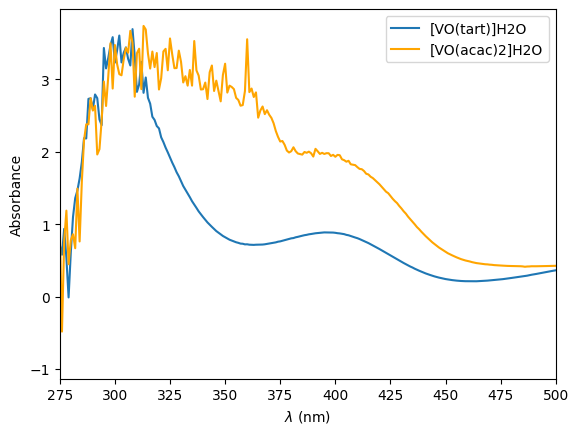

In [21]:
import numpy as np
import matplotlib.pyplot as plt

l = [190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100]
tA = [-0.4145674706,0.02589464188,0.6456212997,0.6974010468,0.01741027832,-0.3270630836,-0.05761051178,0.124786377,0.02173519135,-0.02792644501,0.4316682816,0.7641477585,0.7208037376,0.01697969437,-0.1756191254,-0.1743927002,0.003358364105,-0.003705501556,0.0105638504,0.2477078438,0.2704658508,-0.00505065918,-0.06463003159,0.00417137146,0.6284184456,-0.8068161011,-0.3343453407,0.3258171082,-0.1353898048,0.3449935913,0.2247424126,-0.5125799179,0.4294481277,0.0002136230469,-0.4459495544,-0.5021772385,-0.2046732903,0.01196670532,-0.3197059631,-0.1969180107,-0.2461185455,-0.487783432,-0.3284773827,-0.1541342735,0.4356713295,0.6483607292,-0.2464914322,0.04914951324,0.05567598343,0.07944822311,0.0007719993591,0.1372218132,-0.1724734306,0.2993044853,0.4881939888,0.0385260582,-0.6074318886,0.1199245453,-0.7689771652,0.4968152046,-0.3454976082,-0.01574802399,0.5649061203,0.876739502,0.4186401367,0.5650048256,0.8427753448,0.08422660828,0.08631706238,0.7067146301,0.05624723434,0.4652957916,-0.5508337021,0.5177016258,0.6146268845,0.4592528343,0.0651473999,-0.2105536461,0.6295657158,1.060172558,0.3183493614,0.5126371384,0.5125522614,0.1038370132,0.4653778076,0.7171773911,0.5781698227,0.9348349571,0.5338916779,-0.01113605499,0.611263752,1.099646091,1.359121323,1.464398384,1.630377769,1.855648518,2.186537743,2.182674408,2.728839397,2.736926556,2.582001209,2.789757252,2.738605976,2.445299625,2.365632534,3.431242943,3.149419308,3.294651985,3.468840122,3.580943584,3.229352474,3.399168968,3.602800369,3.231983185,3.363568783,3.43989563,3.281942368,3.189781189,3.691535473,3.314516544,2.825285435,2.927237034,3.238622189,2.81229353,3.023927212,2.744278431,2.663282871,2.482206821,2.438468456,2.354043961,2.32163763,2.198212147,2.133127213,2.056738853,1.990615845,1.919974804,1.849890232,1.78674984,1.716297626,1.660553932,1.593428612,1.526431084,1.474877357,1.422232151,1.372109413,1.316523075,1.271257401,1.22441864,1.176468849,1.135816097,1.097484589,1.06167078,1.023822308,0.9930739403,0.9626765251,0.9340353012,0.9045181274,0.8813099861,0.8595914841,0.8369297981,0.8196668625,0.8036875725,0.7854003906,0.7734975815,0.7622375488,0.749979496,0.7420530319,0.7316198349,0.7295050621,0.72097826,0.722178936,0.7165493965,0.7157878876,0.7138466835,0.716237545,0.7163667679,0.7176856995,0.7186102867,0.7220392227,0.7273211479,0.7328667641,0.7373533249,0.7420282364,0.7487707138,0.757932663,0.7624993324,0.7707858086,0.7790131569,0.7865557671,0.7957744598,0.8041291237,0.808119297,0.8185105324,0.8249406815,0.8330922127,0.8403611183,0.8475985527,0.8525266647,0.859723568,0.8639740944,0.8698439598,0.8742022514,0.8769264221,0.8790831566,0.8838534355,0.8861346245,0.8857450485,0.885887146,0.88458395,0.8837590218,0.8803858757,0.8752789497,0.8721365929,0.8674302101,0.8621063232,0.8521556854,0.8463654518,0.835911274,0.8262047768,0.8156247139,0.8063254356,0.7942790985,0.7804675102,0.7662482262,0.7519803047,0.7389307022,0.7227215767,0.7069163322,0.6904864311,0.6732373238,0.656873703,0.6391639709,0.621114254,0.603208065,0.58558321,0.569442749,0.5498590469,0.5320768356,0.5149798393,0.4974708557,0.4806966782,0.4637107849,0.4475317001,0.4311122894,0.4150114059,0.4015626907,0.3853273392,0.3710007668,0.3576955795,0.3447699547,0.332423687,0.3197498322,0.3084430695,0.298573494,0.2882494926,0.2787723541,0.2703666687,0.2623887062,0.2551951408,0.2483782768,0.2422232628,0.2371101379,0.2320604324,0.2278423309,0.22387743,0.2208075523,0.2178349495,0.2157430649,0.2140836716,0.2128663063,0.2124443054,0.212038517,0.2119727135,0.2109560966,0.2119483948,0.2135062218,0.2150025368,0.2168474197,0.2182059288,0.2207736969,0.2235732079,0.2257804871,0.2286319733,0.2314214706,0.2348151207,0.2381606102,0.2411870956,0.2450728416,0.2491106987,0.2537708282,0.2579808235,0.2624950409,0.266623497,0.2707529068,0.2753152847,0.2803378105,0.2835679054,0.2889819145,0.2961258888,0.3018293381,0.3064684868,0.3120908737,0.3179926872,0.3229136467,0.328625679,0.334663868,0.3407459259,0.3461551666,0.3524446487,0.3576364517,0.3635110855,0.3688821793,0.3737816811,0.3796715736,0.3845367432,0.3902845383,0.3957629204,0.4009666443,0.4053344727,0.4102129936,0.4152526855,0.4198303223,0.4236450195,0.4286055565,0.4330210686,0.4357085228,0.4392580986,0.4422254562,0.446149826,0.4488487244,0.451256752,0.4537444115,0.4557795525,0.4580168724,0.4596714973,0.4610466957,0.4615001678,0.4621510506,0.4630784988,0.4626383781,0.4622049332,0.4622297287,0.4620099068,0.4605855942,0.4586596489,0.4577555656,0.4561648369,0.4541134834,0.451921463,0.4490513802,0.4467191696,0.4440903664,0.4405446053,0.4372324944,0.434568882,0.4312338829,0.4283189774,0.4250178337,0.4211416245,0.4177632332,0.4146118164,0.4110803604,0.4074239731,0.4041585922,0.4012236595,0.397705555,0.3949098587,0.3919043541,0.389070034,0.3864154816,0.383600235,0.3817124367,0.3787484169,0.3772058487,0.3745279312,0.3725209236,0.3710021973,0.3692598343,0.3670964241,0.3653850555,0.3638563156,0.362678051,0.3612565994,0.3598566055,0.3581762314,0.3576173782,0.356156826,0.3548746109,0.3539671898,0.3529257774,0.3515086174,0.3507528305,0.3488502502,0.3489313126,0.3478198051,0.3464856148,0.3457388878,0.3444180489,0.3427934647,0.3414812088,0.3407392502,0.3392925262,0.3377490044,0.3356585503,0.3343343735,0.3323688507,0.3306674957,0.3288936615,0.3268771172,0.3249778748,0.3228583336,0.3205685616,0.3179121017,0.3151297569,0.3131637573,0.31082201,0.308008194,0.3054895401,0.3027324677,0.2996883392,0.2970781326,0.2954316139,0.2922644615,0.2882723808,0.2847747803,0.2839379311,0.2804369926,0.2753477097,0.2728214264,0.2698721886,0.2662334442,0.2631540298,0.2595643997,0.2552118301,0.2519688606,0.2488474846,0.2456650734,0.2421021461,0.2384195328,0.2350177765,0.2316255569,0.2284526825,0.2250275612,0.2214841843,0.2183952332,0.2154688835,0.2120952606,0.2087278366,0.2056293488,0.2029161453,0.199532032,0.1970481873,0.1933946609,0.1904635429,0.188580513,0.1863718033,0.1827697754,0.1798048019,0.1773838997,0.1752638817,0.1728825569,0.1706519127,0.1681990623,0.1656494141,0.1636042595,0.160598278,0.1544065475,0.1556839943,0.155315876,0.1542801857,0.1527357101,0.1514234543,0.1497569084,0.1482200623,0.1469316483,0.1456050873,0.1443490982,0.1431193352,0.1420259476,0.1407752037,0.139746666,0.1388344765,0.1379699707,0.137032032,0.136551857,0.1357254982,0.1352534294,0.134768486,0.1340589523,0.1338448524,0.1336278915,0.1329865456,0.1326694489,0.1326322556,0.1323804855,0.1322836876,0.1323328018,0.1323971748,0.1323719025,0.1324920654,0.1327524185,0.1329774857,0.1331248283,0.1335654259,0.1339449883,0.1343092918,0.1348452568,0.1354317665,0.1358933449,0.1364574432,0.1371765137,0.1379132271,0.138689518,0.1394147873,0.1404209137,0.1412014961,0.1419038773,0.1428260803,0.1439142227,0.1448569298,0.1460137367,0.1471195221,0.1482505798,0.1494812965,0.150785923,0.1518464088,0.1533484459,0.1546998024,0.1560335159,0.1572394371,0.1587553024,0.1601715088,0.161781311,0.1632566452,0.1646699905,0.1662335396,0.1677179337,0.1693787575,0.1710567474,0.172888279,0.1744861603,0.1761398315,0.1780753136,0.179705143,0.1815218925,0.1834139824,0.1852936745,0.187005043,0.1891479492,0.190890789,0.192814827,0.194870472,0.1967816353,0.1989154816,0.2008037567,0.202893734,0.2048225403,0.2069530487,0.2088766098,0.2110424042,0.2130770683,0.2152404785,0.2173528671,0.2196893692,0.2217512131,0.2240328789,0.2261681557,0.2283401489,0.230568409,0.2327313423,0.234793663,0.2372813225,0.2395720482,0.2418041229,0.2440347672,0.2464709282,0.248793602,0.2510552406,0.2531304359,0.2555031776,0.2579140663,0.2600564957,0.2625217438,0.2648887634,0.2674384117,0.2697672844,0.2722315788,0.2747273445,0.2772679329,0.2795596123,0.2821860313,0.2845053673,0.2870693207,0.2895689011,0.2921290398,0.2942595482,0.2967133522,0.2992415428,0.3017649651,0.3039503098,0.3063197136,0.3082356453,0.3104724884,0.3126163483,0.3147263527,0.3167123795,0.3186445236,0.3206181526,0.3226947784,0.3251318932,0.3280158043,0.3308310509,0.3337516785,0.3366889954,0.339454174,0.34223032,0.3449954987,0.3472409248,0.350025177,0.3522109985,0.3547782898,0.357336998,0.3595871925,0.3619318008,0.3643231392,0.3665828705,0.3686685562,0.370900631,0.3729023933,0.3753390312,0.3773131371,0.3796596527,0.3815264702,0.3838653564,0.3857493401,0.3876028061,0.3898715973,0.3916106224,0.3938245773,0.3955597878,0.3974123001,0.3991179466,0.4011831284,0.4028401375,0.40447855,0.4065361023,0.4083123207,0.4095849991,0.4115462303,0.4130730629,0.4149470329,0.4163212776,0.4181652069,0.419526577,0.4212460518,0.4223027229,0.4238157272,0.4251413345,0.4266829491,0.4281373024,0.4293889999,0.4305591583,0.4315752983,0.4328041077,0.4340987206,0.4350881577,0.4364690781,0.4371767044,0.4382419586,0.4393644333,0.4402523041,0.4411273003,0.4418354034,0.4427852631,0.4438209534,0.4442257881,0.4446549416,0.4456472397,0.4461936951,0.4471230507,0.4469923973,0.4481167793,0.4483947754,0.4484677315,0.4491238594,0.4494142532,0.4500017166,0.4499163628,0.4501032829,0.4503369331,0.4508810043,0.4505434036,0.4510040283,0.4505085945,0.4506382942,0.450340271,0.4499640465,0.449154377,0.4490618706,0.4485125542,0.4479990005,0.4472556114,0.4472923279,0.446703434,0.4462504387,0.4458613396,0.4457364082,0.445016861,0.444899559,0.443795681,0.4432840347,0.4430031776,0.4420661926,0.4419412613,0.4415044785,0.4405517578,0.4397649765,0.4387426376,0.438287735,0.4372887611,0.4367704391,0.4359064102,0.4343934059,0.4343357086,0.4327425957,0.4316806793,0.4304838181,0.4291114807,0.4283056259,0.4273033142,0.4253396988,0.424082756,0.4233937263,0.421298027,0.4202942848,0.4191632271,0.4174470901,0.4157414436,0.4142804146,0.4125556946,0.4110612869,0.4095878601,0.4076461792,0.4064898491,0.4054841995,0.4035258293,0.402215004,0.4009318352,0.399515152,0.3972802162,0.3961181641,0.3946084976,0.3928222656,0.3915019035,0.389295578,0.3879880905,0.3858337402,0.3842821121,0.3823542595,0.3805642128,0.3785324097,0.37738657,0.3754286766,0.3737406731,0.3722453117,0.3698444366,0.3687415123,0.3670873642,0.3639559746,0.3624448776,0.3604140282,0.3582177162,0.3567285538,0.3543591499,0.3524169922,0.3496484756,0.3481321335,0.3466482162,0.3440995216,0.3414416313,0.3397092819,0.3384189606,0.3358635902,0.3330359459,0.3305492401,0.3281269073,0.3257455826,0.3241510391,0.3222513199,0.3194537163,0.3178787231,0.314218998,0.3121004105,0.309006691,0.3070473671,0.3035416603,0.300403595,0.2977924347,0.2958636284,0.293088913,0.2903046608,0.2885785103,0.2854824066,0.2835726738,0.2804002762,0.2760472298,0.2733435631,0.2697110176,0.2667784691,0.2634534836,0.261452198,0.2589559555,0.2561645508,0.2535319328,0.2496352196,0.2487449646,0.2466421127,0.2437443733,0.2422537804,0.2404184341,0.2355213165,0.2343044281,0.2324228287,0.2295475006,0.2280216217,0.2242383957,0.2220101357,0.2195725441,0.2200064659,0.2137722969,0.2149748802,0.2114691734,0.2075839043,0.2056965828,0.200735569,0.2001771927,0.1970233917,0.1939482689,0.1863360405,0.1868581772,0.1813988686,0.1759414673,0.1724238396,0.1688156128,0.1621761322,0.1546049118,0.153046608,0.1468391418,0.144536972,0.1371436119,0.1306533813,0.129635334,0.1264696121,0.1276493073,0.1296520233,0.1296591759,0.1350531578,0.1327800751,0.1400537491,0.1375002861,0.1409282684,0.1426901817,0.1414890289,0.1438612938,0.144010067,0.142329216,0.1447296143,0.1408200264,0.1466760635,0.1458368301,0.1428165436,0.1429257393,0.1433949471,0.1374435425,0.1347174644,0.1391220093,0.1379060745,0.1359987259,0.1334791183,0.1355352402,0.12931633,0.1285252571,0.1302080154,0.1340603828,0.1281709671,0.1282339096,0.1290254593,0.1229834557,0.127427578,0.1265358925,0.1240105629,0.1202054024,0.122651577,0.1260619164,0.1136574745,0.1164937019,0.1232051849,0.124309063,0.1159038544,0.122838974,0.1270461082,0.1116318703,0.1242771149,0.1104326248,0.1206202507,0.1066389084,0.1154031754,0.1041126251,0.1080889702,0.115981102,0.1005840302]
aA = [0.07376670837,0.3930931091,0.02372598648,0.2503285408,0.1320152283,0.273850441,0.0734205246,-0.2389578819,-0.5283069611,0.2614798546,-0.2464709282,-0.307826519,-0.2038106918,0.5979294777,0.006737709045,-0.003568649292,-0.2877378464,0.6298079491,0.2475795746,0.05866765976,0.5636973381,0.05569124222,0.6528162956,0.009178638458,0.1554298401,-0.9012403488,-0.5394177437,0.2345924377,0.2471804619,-0.6251430511,-0.4220881462,-0.02027082443,0.324379921,-0.1277852058,-0.6493706703,-0.3218588829,0.5325746536,0.3359808922,0.4478039742,0.5947980881,0.4450817108,0.4607820511,0.244325161,0.392250061,-0.1948680878,0.1646375656,0.9377121925,0.2244844437,-0.320704937,-0.03207206726,-0.04390382767,0.4776449203,-0.1350073814,0.3334579468,0.4372315407,-0.1883478165,0.6958670616,0.178006649,0.6796126366,-0.4584674835,0.6351113319,-0.3549656868,0.6204152107,-0.8330492973,0.1681089401,0.5334687233,0.1793041229,-0.03504943848,0.6796007156,0.2400393486,0.8427152634,0.3205723763,0.1160178185,-0.5029397011,0.1886725426,-0.00519323349,-0.1763854027,-0.1837558746,0.6286745071,0.8767251968,-0.1996188164,-0.4134507179,0.4176511765,0.6204218864,0.2947845459,0.9813370705,-0.4826350212,0.7681665421,1.186541557,0.4468874931,0.7776331902,0.8609743118,0.6677951813,1.49065876,0.7610034943,1.583301544,2.157617569,2.377607822,2.377102375,2.738225937,2.567574024,2.633417606,1.961377144,2.034973621,2.434028149,2.968654633,2.630877495,3.041658401,3.497217178,2.871173859,3.472304821,3.209358215,3.070156574,3.054672241,3.272678375,3.433764935,3.365766048,3.667497635,3.498781204,2.758802414,3.359447479,3.42134285,2.863685131,3.735639572,3.686316967,3.356310368,3.147531033,3.381703377,3.167619228,3.361494541,2.858422756,3.014111042,3.383285522,3.41955471,3.123476505,3.562567711,3.344874859,3.152553082,3.154471397,3.394337654,3.24017477,2.955147266,3.041847706,2.911163807,3.127866268,2.911658287,3.527253151,3.121783257,3.05027771,2.858192444,2.862146854,2.954016685,2.726701736,3.09638834,3.189506054,2.837789059,2.980473518,2.838694096,2.694782257,3.059066296,3.214159966,2.815525055,2.911486149,2.89299345,2.863049984,2.74266386,2.713769913,2.63453722,2.643155575,2.837798595,3.551626205,2.822070599,2.871469975,2.754869461,2.818284035,2.469168663,2.568843842,2.623769283,2.518425465,2.572134495,2.510035038,2.46633482,2.392510414,2.28523159,2.204574585,2.140273571,2.147539616,2.094903946,2.015899658,1.988706112,2.006577492,2.060786247,2.006951809,1.974772453,1.96792078,1.959662437,1.995847702,1.984807968,2.000578403,1.978663921,1.932757854,2.039482594,2.005634308,1.968932152,1.984437943,1.968800545,1.979424953,1.978579044,1.940813541,1.956663609,1.92978096,1.956171513,1.951446056,1.895328999,1.882937431,1.86194849,1.874314308,1.82603693,1.819619179,1.814668179,1.78658247,1.762662411,1.758063316,1.733632088,1.695585251,1.685959816,1.654553413,1.636013508,1.607687473,1.580550194,1.55090332,1.516993046,1.483310223,1.448175907,1.427053452,1.38816309,1.350800037,1.318302155,1.290566921,1.250721931,1.21624136,1.177321911,1.144827843,1.103075504,1.068677425,1.034425735,0.9983291626,0.9605002403,0.9310259819,0.8964309692,0.8641834259,0.8337779045,0.8051481247,0.7759289742,0.749063015,0.7246613503,0.7014417648,0.6776127815,0.6579127312,0.6365437508,0.6195988655,0.5992789268,0.5850949287,0.5695123672,0.5549015999,0.541946888,0.5300107002,0.5176463127,0.5078988075,0.4987750053,0.4917407036,0.4848861694,0.4759011269,0.4691405296,0.4627275467,0.4582104683,0.4546761513,0.4508152008,0.4464468956,0.4449396133,0.4410638809,0.4390602112,0.4349136353,0.4324359894,0.4310750961,0.4297962189,0.4273614883,0.425593853,0.4239602089,0.423760891,0.4222331047,0.4217910767,0.4210653305,0.4195785522,0.4192948341,0.4169955254,0.4121212959,0.4155035019,0.4164438248,0.4190239906,0.4184346199,0.4188804626,0.419274807,0.4194674492,0.4203696251,0.421022892,0.422000885,0.4230947495,0.4230585098,0.424053669,0.4256887436,0.4259753227,0.4270019531,0.4283995628,0.430138588,0.4312252998,0.4329128265,0.4341545105,0.4357118607,0.4384770393,0.4394226074,0.4414978027,0.4438800812,0.4460258484,0.4478926659,0.4498949051,0.4524517059,0.454975605,0.4571495056,0.4593777657,0.4621305466,0.4643068314,0.4677109718,0.4700980186,0.4726634026,0.4753961563,0.4782037735,0.4813294411,0.4846525192,0.4877495766,0.4911904335,0.4941496849,0.4966902733,0.5004315376,0.5033407211,0.5066256523,0.5100550652,0.5133881569,0.5166158676,0.5200881958,0.5231285095,0.526424408,0.5298304558,0.5326728821,0.5359377861,0.5398030281,0.5423130989,0.5463628769,0.5492653847,0.5520071983,0.5549516678,0.5585465431,0.5613026619,0.5638933182,0.5664010048,0.568883419,0.5717082024,0.5739378929,0.5758051872,0.5783596039,0.579890728,0.5822229385,0.5841555595,0.585691452,0.587556839,0.588956356,0.5903196335,0.5907683372,0.5910897255,0.5913906097,0.5912451744,0.5920538902,0.5923867226,0.5922527313,0.5916810036,0.5923967361,0.5918345451,0.5907115936,0.5902309418,0.5896244049,0.5886864662,0.5872635841,0.5855045319,0.5859799385,0.5856304169,0.5844573975,0.5836181641,0.5822892189,0.5799570084,0.5783338547,0.5780053139,0.5770478249,0.5754098892,0.5728263855,0.5706739426,0.5678730011,0.5664052963,0.5647149086,0.5629663467,0.5612902641,0.5592899323,0.5571975708,0.5545668602,0.5514683723,0.5498771667,0.5487208366,0.5469198227,0.5446710587,0.5432548523,0.5412540436,0.5380587578,0.5341458321,0.5325284004,0.5330762863,0.5329627991,0.5312151909,0.5320882797,0.5321574211,0.5309405327,0.528986454,0.5266075134,0.5250062943,0.5239214897,0.5236358643,0.523144722,0.5226240158,0.521859169,0.5214438438,0.5212526321,0.5211815834,0.5211181641,0.5215063095,0.5218868256,0.522591114,0.5226039886,0.5231118202,0.5235009193,0.5248317719,0.5256986618,0.5265450478,0.5280089378,0.5294761658,0.5312652588,0.5334010124,0.5325527191,0.5337204933,0.5363101959,0.5401277542,0.5426549911,0.5447068214,0.546412468,0.5483541489,0.551194191,0.5531992912,0.556517601,0.5584030151,0.5529251099,0.5461940765,0.561378479,0.5708594322,0.5741333961,0.578373909,0.5816626549,0.5849299431,0.5886507034,0.5924096107,0.5963277817,0.5997929573,0.6044583321,0.6084394455,0.6125044823,0.617497921,0.6215238571,0.6260504723,0.6303634644,0.6351490021,0.6397032738,0.6446528435,0.649553299,0.6545553207,0.6592116356,0.6642489433,0.6693205833,0.6745700836,0.6794686317,0.684527874,0.6897025108,0.6953201294,0.7010340691,0.7058973312,0.7115521431,0.7171721458,0.7231030464,0.7283058167,0.7338833809,0.7394571304,0.7456507683,0.7502331734,0.7565703392,0.762237072,0.7682256699,0.7735929489,0.7790517807,0.7850356102,0.7909550667,0.7966198921,0.802421093,0.8079428673,0.8135151863,0.8189043999,0.8244843483,0.8306002617,0.8358521461,0.8425145149,0.8472180367,0.8526463509,0.8583335876,0.8640832901,0.8691449165,0.8743748665,0.87967062,0.8850207329,0.8904242516,0.8954911232,0.9011516571,0.9064097404,0.91117239,0.9158992767,0.9205861092,0.9255309105,0.9298758507,0.9353456497,0.9401097298,0.9435129166,0.9484710693,0.9535183907,0.9569487572,0.961265564,0.9655618668,0.9694895744,0.9734249115,0.9769172668,0.9812364578,0.9851417542,0.9887714386,0.9933366776,0.9969086647,0.9997472763,1.002946377,1.006112576,1.008584499,1.011814117,1.015094757,1.017092705,1.021067142,1.023251057,1.0257411,1.028831959,1.030980587,1.033205032,1.034923077,1.03611517,1.039971828,1.041372299,1.04289484,1.044214725,1.046022892,1.046658993,1.047970295,1.049095631,1.050479889,1.051235676,1.051166058,1.052772045,1.052014351,1.054392815,1.053992748,1.054314137,1.054393768,1.054740429,1.053757191,1.053518295,1.051604271,1.051260471,1.050394535,1.049535275,1.048266411,1.048094749,1.046710014,1.046085835,1.043753147,1.042361259,1.039931774,1.038986206,1.03512907,1.034708977,1.031568527,1.02950716,1.02737236,1.024175167,1.02145195,1.018816471,1.016271591,1.013545513,1.008662701,1.00675106,1.004510403,0.9990468025,0.9972214699,0.9920105934,0.9892082214,0.9857444763,0.9814476967,0.9776239395,0.9744586945,0.9695363045,0.9656963348,0.9612755775,0.9574203491,0.9535717964,0.9492368698,0.9453191757,0.9393987656,0.9355449677,0.9312429428,0.9261083603,0.9213891029,0.916510582,0.9117350578,0.9078617096,0.9015636444,0.8977270126,0.8911733627,0.8867378235,0.8809313774,0.8761687279,0.8707361221,0.8657903671,0.8597354889,0.8553152084,0.849114418,0.844086647,0.8391919136,0.8335075378,0.827495575,0.8228721619,0.8171820641,0.8117952347,0.8053388596,0.8000016212,0.7945227623,0.787879467,0.7822399139,0.7770166397,0.7715005875,0.7654647827,0.7587161064,0.753692627,0.7477164268,0.7416834831,0.7362408638,0.7308225632,0.7242808342,0.719707489,0.7140860558,0.708240509,0.7018742561,0.6960635185,0.6907730103,0.6853713989,0.6795182228,0.6739330292,0.6683149338,0.6624307632,0.6567382813,0.6514554024,0.6455540657,0.6403932571,0.634581089,0.6293334961,0.6236877441,0.618332386,0.6132450104,0.6073346138,0.6024680138,0.597091198,0.5913572311,0.5862965584,0.5807781219,0.5758914948,0.5700340271,0.5649228096,0.5604577065,0.5552101135,0.5502462387,0.5456938744,0.5408182144,0.5351977348,0.5309233665,0.5263466835,0.5214977264,0.5166664124,0.512424469,0.5075058937,0.5027961731,0.4990792274,0.4940052032,0.4898962975,0.4849357605,0.4814329147,0.4769492149,0.4729351997,0.4689016342,0.4640703201,0.4611954689,0.4569358826,0.4528589249,0.4484500885,0.4451079369,0.4413633347,0.4379639626,0.4343719482,0.4308280945,0.4273729324,0.4234762192,0.4206461906,0.4166941643,0.4135475159,0.4099097252,0.4078183174,0.404718399,0.4016866684,0.3983030319,0.3948841095,0.3924322128,0.3901181221,0.3866467476,0.3841223717,0.3816275597,0.3786425591,0.3761935234,0.3731923103,0.371240139,0.3680281639,0.3662247658,0.3635869026,0.3613228798,0.3584856987,0.3567838669,0.3538141251,0.3516325951,0.3499779701,0.347486496,0.3447461128,0.3428902626,0.3402171135,0.3380537033,0.3364033699,0.3337798119,0.3321199417,0.3298163414,0.3275728226,0.3257513046,0.3240613937,0.3225440979,0.3211345673,0.3194069862,0.3163352013,0.3153591156,0.3131346703,0.3113708496,0.3100476265,0.3079838753,0.3059830666,0.3041219711,0.3027458191,0.300796032,0.2993693352,0.2976016998,0.2960386276,0.2949295044,0.2920055389,0.2917838097,0.2901306152,0.2884793282,0.2870082855,0.2847466469,0.2837190628,0.2817463875,0.280667305,0.2789697647,0.2777237892,0.2753677368,0.2739653587,0.2736105919,0.2718353271,0.2698435783,0.2680382729,0.2683992386,0.2655100822,0.2634754181,0.263862133,0.2620310783,0.2610259056,0.2586174011,0.2586269379,0.2565073967,0.2549562454,0.2543287277,0.2523374557,0.2528824806,0.2488718033,0.249361515,0.2493748665,0.2466225624,0.2461881638,0.244571209,0.2445883751,0.2421722412,0.241502285,0.2400569916,0.239593029,0.238928318,0.2368359566,0.2366275787,0.2350788116,0.2344818115,0.2357225418,0.2297124863,0.2314100266,0.2317175865,0.2293987274,0.2305030823,0.2270531654,0.2269878387,0.2255301476,0.2285003662,0.2243256569,0.22448349,0.2204389572,0.2217850685,0.2258367538,0.2216916084,0.2206249237,0.2202153206,0.2190980911,0.218167305,0.2161431313,0.2158756256,0.2197146416,0.2161641121,0.2164497375,0.217795372,0.2122244835,0.2145938873,0.2143421173,0.2098879814,0.2143893242,0.212290287,0.210524559,0.2133145332,0.2136793137,0.2085504532,0.2039427757,0.2127537727,0.2091093063,0.206679821,0.2016234398,0.204407692,0.2055721283,0.2070736885,0.2034716606,0.2084255219,0.1960992813,0.2016839981,0.2047224045,0.2095227242,0.2042489052,0.1992273331,0.2067918777,0.1954555511,0.2099728584,0.2044410706,0.2032938004,0.2027025223,0.1979641914,0.2015910149,0.2098975182,0.1992588043,0.1922450066,0.2005586624,0.2052340508,0.2024145126,0.1967258453,0.2193112373,0.2153534889,0.1969051361,0.2105326653,0.2008419037,0.2016386986,0.20008564]
plt.plot(l,tA, label = "[VO(tart)]H2O")
plt.plot(l,aA, color='orange', label = "[VO(acac)2]H2O")
plt.ylabel('Absorbance')
plt.xlabel('$\lambda$ (nm)')
plt.xlim([275, 500])
plt.legend(loc="upper right")
